In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import scipy  ## what is scipy  its mainly used for the nurmercial calculations build on the top of the numpy
import sys

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.Class.value_counts() #this is  target variable for the give  data also the its comes under the supervised learning

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data.shape  # this is the shape of the data

(284807, 31)

In [6]:
data.info() # this is information check for any null values in the data sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum() ## you can see the datasets is variable and features does not  make any sense basically this is the output data of the PCA which is reduced demeinal ""

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.columns ## all the columns of the datasets

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
## to understand the features import we need to understand the basics of the what is the uses of PCA
## PCA output will in the form corrvarience of the variable or feature with respect to the feacte
##usually ranges for -2 to 2
##since the dataset has more than 200 thousands rows we can use to take small portion for  our algorithm testing
reduced= data.sample(frac=0.2,random_state=1)
print("the shape of the reduced data sample is", reduced.shape)

the shape of the reduced data sample is (56961, 31)


In [10]:
reduced.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [11]:
reduced.Class.value_counts()

0    56874
1       87
Name: Class, dtype: int64

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

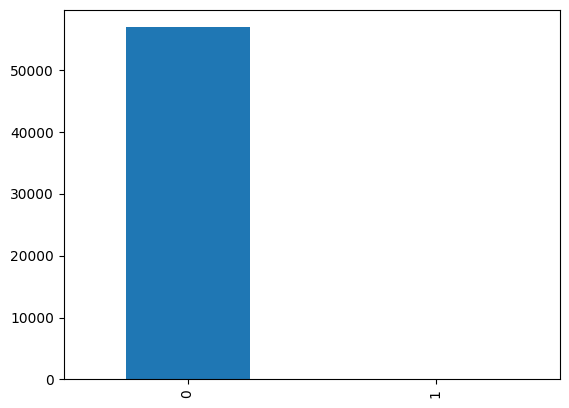

In [13]:
## before moving lets do some of the visual graphs to understand the relations between the data
reduced.Class.value_counts().plot.bar() ## we can see the  value of fraud is very less in this class

In [14]:
# Wow! The count of fraudulent transactions as compared to the non fraudulent one's is almost null. It makes it so difficult for us to classify the test data.
# Remember, Rule 1 of the dataset is that the predicted value should be somewhat equally divided between the two classes!
# Anyway, lets see how well we are able to perform!
print("the total fraud percentage",(492/284983)*100)

the total fraud percentage 0.1726418768838843


<Axes: xlabel='Amount', ylabel='Density'>

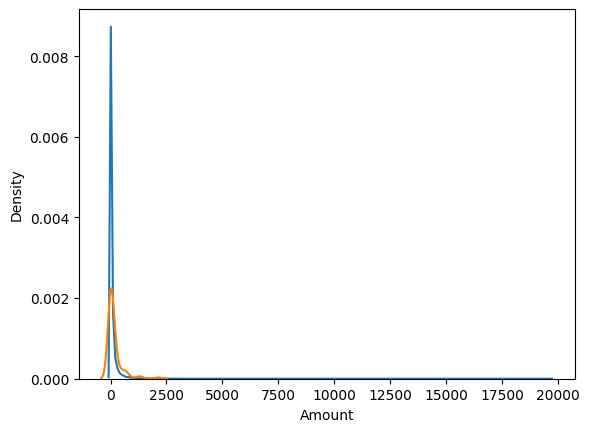

In [15]:
sns.kdeplot(reduced.Amount[reduced['Class']==0])
sns.kdeplot(reduced.Amount[reduced['Class']==1])
### the frad case happend with the less number of the amount so when doing the transistion btw 0 - 2500 most frad happened
## similar lets check the for the timer when most frad case happend

<Axes: xlabel='Time', ylabel='Density'>

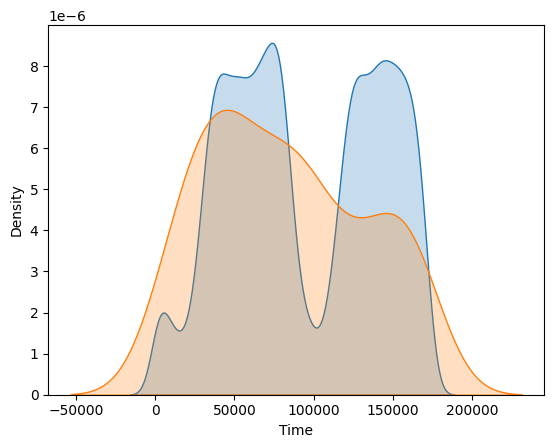

In [16]:
sns.kdeplot(reduced.Time[reduced['Class']==0],fill=True)
sns.kdeplot(reduced.Time[reduced['Class']==1],fill=True)
##we can see  time  has no impact on the frad

In [17]:
## mostly we try to do the feature engineering but here we can see that no data is co related to eacch  other therefore
## we have to take all the columns then will apply to model
col = reduced.columns.tolist()
col

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [18]:
colsx = [c for c in col if c not in ['Class']]
X = reduced[colsx]
y= reduced['Class'] ## take the training features and values for the target for the data set

In [19]:
## this is the classification comes under the anamoly detection which means it happens very less in the datset
## so therefore some of the
##1 .Iso lation Forest  2. Locial Outlier Factor 3. one class SVM 4. Guassian Mixture Model(GMM) 5.AutoEnoceders 6.K-Nearest Neighbors (KNN)
## 7.DBSCAN (Density Based spatial classification) 8. Bayesian Networks
##lets see the each model and its score for the rest



In [20]:
## importing libraies for the need  moodel
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture
### sorry to say that it seems isolation forest comes under the unsupervised algorithm so we no need to send the  label output
## instead for the anomaly detection we have send tthe values which is number of the outiler we think there are in the dataset

In [21]:
## now lets find out the number of the outiler(fraud countin other words) in the dataset
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
## the fraud count consider to total amount of data is  0.0017304750013189597 , we will pass this to functions

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [40]:
## apply all the algorithms in the dict then we  will run all the at same time

classifier = {
    'Isolation Forest': IsolationForest(
        max_samples= len(X), contamination = outlier_fraction,
                                       random_state = 1),
    'LocalOutlierFactor': LocalOutlierFactor(
        n_neighbors = 20, ## to calculate the density its separate based on the density by using k-neighbors, this can impact the score
        contamination = outlier_fraction
    ),

    'OneClassSVM':OneClassSVM(kernel='rbf',nu=outlier_fraction),

    ##nu smae as the contamiation its number of expected outlier percentage
    ## if we tunning the parameters we can able to get the good results


}

In [41]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifier.items()):


    # fit the data and tag outliers
    if clf_name == 'LocalOutlierFactor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name=='GMM':

       clf.fit(X)
       y_pred = clf.predict(X)

    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)



# reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

     # calculate the number of errors
    n_errors = (y_pred != y).sum()

    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 136
0.9976124014676708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.25      0.29      0.27        87

    accuracy                           1.00     56961
   macro avg       0.63      0.64      0.63     56961
weighted avg       1.00      1.00      1.00     56961

LocalOutlierFactor: 182
0.9968048313758536
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.02      0.02      0.02        87

    accuracy                           1.00     56961
   macro avg       0.51      0.51      0.51     56961
weighted avg       1.00      1.00      1.00     56961

OneClassSVM: 206
0.9963834904583838
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.00      0.00      0.00        87

    accuracy                           1.00     56961
   macro

Our Isolation Forest method (which is Random Forest based) was able to produce a better result. Looking at the f1-score 26% (or approx. 30%) of the time we are going to detect the fraudulent transactions.

our recall score should be high for predicting the values for fraud
since Isolationforest helps us to get the good result compare to others

GMM

In [42]:
clf =  GaussianMixture(n_components=1)
clf.fit(X)
y_pred = clf.predict(X) ## reason we are using outside the classifier is that we have the output as 1,0
## so unlike one classSVM and Isolation forest we no need to convert the range -1 to 1 and 1 to 0

In [45]:
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.3727287091167641
              precision    recall  f1-score   support

           0       1.00      0.37      0.54     56874
           1       0.00      0.18      0.00        87

    accuracy                           0.37     56961
   macro avg       0.50      0.28      0.27     56961
weighted avg       1.00      0.37      0.54     56961

